In [ ]:
# Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [1]:
import pandas as pd
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
# to find which of the variables are more closely associated with our target variable we do groupby
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [3]:
# from the above result we can see that the variables which can help distinguish between the classes of the targer variable are
#1.) satisfaction_level
#2.) average_montly_hours
#3.) promotion_last_5years

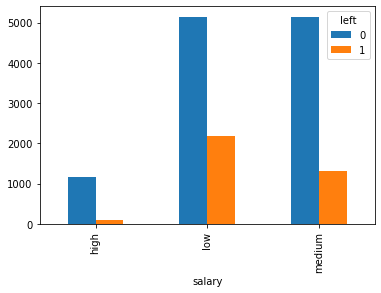

In [4]:
# checking the effect of salary on employee retention
pd.crosstab(data.salary, data.left).plot(kind = 'bar')

In [5]:
# from the above result we can say that employee with high salary leave less

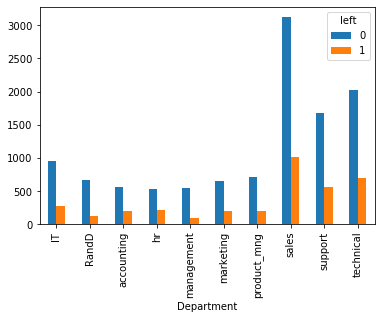

In [6]:
# checking effect of department on employee retention
pd.crosstab(data.Department, data.left).plot(kind = "bar")

In [ ]:
# The impact of department is not major so we can exclude it from our analysis 

In [7]:
# So for our analysis we select:
#1.) satisfaction_level
#2.) average_montly_hours
#3.) promotion_last_5years
#4.) salary

In [9]:
selected_features = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
selected_features.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [14]:
# salary is categorical, it needs to be encoded into numbers using one hot encoding
salary_dummy_var = pd.get_dummies(selected_features.salary, prefix="salary")
salary_dummy_var

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [23]:
# concatenating to our selected features dataframe
final_df = pd.concat([selected_features,salary_dummy_var], axis = 'columns')
final_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [24]:
# dropping one of the dummy variables to avoid dummy variable trap / multi collinearity
final_df.drop('salary_medium', axis = 'columns', inplace = True)

# dropping the salary column as it is no longer required
final_df.drop('salary', axis = 'columns', inplace = True)

final_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [25]:
x = final_df

In [27]:
y = data.left

In [30]:
from sklearn.model_selection import train_test_split
xtrain, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [28]:
from sklearn import linear_model
log_reg_model = linear_model.LogisticRegression()

In [32]:
log_reg_model.fit(xtrain, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = log_reg_model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
log_reg_model.score(x_test, y_test)

0.7833333333333333

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7833333333333333

In [39]:
log_reg_model.predict_proba(x_test)

array([[0.85491466, 0.14508534],
       [0.24336466, 0.75663534],
       [0.69964311, 0.30035689],
       ...,
       [0.91766123, 0.08233877],
       [0.85544206, 0.14455794],
       [0.96744019, 0.03255981]])